In [2]:
import warnings
import pandas as pd
import numpy as np

from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)
warnings.filterwarnings("ignore")

init_notebook_mode(connected=True)

# 1. Análisis exploratorio

In [3]:
# Cargamos el dataset descargado de Kaggle como pandas dataframe
df = pd.read_csv('male_players.csv').reset_index(drop=True)
# Mostramos las primeras filas del dataframe
df.head(10)

Unnamed: 0.1  Unnamed: 0  Rank                  Name  OVR  PAC  SHO  PAS  \
0             0           0     1         Kylian Mbappé   91   97   90   80   
1             1           1     2                 Rodri   91   66   80   86   
2             2           2     4        Erling Haaland   91   88   92   70   
3             3           3     5       Jude Bellingham   90   80   87   83   
4             4           4     7              Vini Jr.   90   95   84   81   
5             5           5     9       Kevin De Bruyne   90   67   87   94   
6             6           6    11            Harry Kane   90   65   93   84   
7             7           7    12       Martin Ødegaard   89   70   82   89   
8             8           8    13  Gianluigi Donnarumma   89   90   84   73   
9             9           9    15               Alisson   89   86   85   85   

   DRI  DEF  PHY  Acceleration  Sprint Speed  Positioning  Finishing  \
0   92   36   78            97            97           93         94   
1   84   87   85            65            66           76         74   
2   81   45   88            80            94           96         96   
3   88   78   83            81            80           91         90   
4   91   29   69            95            95           87         89   
5   87   65   78            67            67           88         84   
6   83   49   82            64            66           94         95   
7   89   67   66            72            69           84         83   
8   90   52   87            50            55           14         12   
9   89   56   90            60            49           13         13   

   Shot Power  Long Shots  Volleys  Penalties  Vision  Crossing  \
0          90          83       84         84      83        78   
1          92          89       71         62      84        76   
2          94          83       90         90      74        58   
3          85          86       77         74      90        66   
4          81          83       73         71      85        81   
5          92          90       83         83      95        95   
6          94          89       89         93      86        80   
7          82          84       79         68      91        86   
8          55          18        8         24      60        12   
9          64          14       20         23      66        17   

   Free Kick Accuracy  Short Passing  Long Passing  Curve  Dribbling  Agility  \
0                  69             86            71     80         93       93   
1                  64             93            91     86         84       66   
2                  62             77            66     77         79       77   
3                  68             89            89     73         89       82   
4                  62             83            77     79         93       94   
5                  83             94            93     93         86       75   
6                  69             86            88     82         82       66   
7                  85             91            89     84         89       85   
8                  14             36            34     12         28       57   
9                  18             60            58     19         27       40   

   Balance  Reactions  Ball Control  Composure  Interceptions  \
0       82         93            92         88             38   
1       67         93            90         94             84   
2       69         94            83         87             43   
3       79         91            89         87             82   
4       84         86            90         83             26   
5       78         92            92         88             66   
6       73         94            87         92             42   
7       83         91            91         87             69   
8       38         84            30         65             26   
9       37         87            42         66             1

In [4]:
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', "url"]).reset_index(drop=True)
df.head(10)

Rank                  Name  OVR  PAC  SHO  PAS  DRI  DEF  PHY  \
0     1         Kylian Mbappé   91   97   90   80   92   36   78   
1     2                 Rodri   91   66   80   86   84   87   85   
2     4        Erling Haaland   91   88   92   70   81   45   88   
3     5       Jude Bellingham   90   80   87   83   88   78   83   
4     7              Vini Jr.   90   95   84   81   91   29   69   
5     9       Kevin De Bruyne   90   67   87   94   87   65   78   
6    11            Harry Kane   90   65   93   84   83   49   82   
7    12       Martin Ødegaard   89   70   82   89   89   67   66   
8    13  Gianluigi Donnarumma   89   90   84   73   90   52   87   
9    15               Alisson   89   86   85   85   89   56   90   

   Acceleration  Sprint Speed  Positioning  Finishing  Shot Power  Long Shots  \
0            97            97           93         94          90          83   
1            65            66           76         74          92          89   
2            80            94           96         96          94          83   
3            81            80           91         90          85          86   
4            95            95           87         89          81          83   
5            67            67           88         84          92          90   
6            64            66           94         95          94          89   
7            72            69           84         83          82          84   
8            50            55           14         12          55          18   
9            60            49           13         13          64          14   

   Volleys  Penalties  Vision  Crossing  Free Kick Accuracy  Short Passing  \
0       84         84      83        78                  69             86   
1       71         62      84        76                  64             93   
2       90         90      74        58                  62             77   
3       77         74      90        66                  68             89   
4       73         71      85        81                  62             83   
5       83         83      95        95                  83             94   
6       89         93      86        80                  69             86   
7       79         68      91        86                  85             91   
8        8         24      60        12                  14             36   
9       20         23      66        17                  18             60   

   Long Passing  Curve  Dribbling  Agility  Balance  Reactions  Ball Control  \
0            71     80         93       93       82         93            92   
1            91     86         84       66       67         93            90   
2            66     77         79       77       69         94            83   
3            89     73         89       82       79         91            89   
4            77     79         93       94       84         86            90   
5            93     93         86       75       78         92            92   
6            88     82         82       66       73         94            87   
7            89     84         89       85       83         91            91   
8            34     12         28       57       38         84            30   
9            58     19         27       40       37         87            42   

   Composure  Interceptions  Heading Accuracy  Def Awareness  Standing Tackle  \
0         88             38                73             26               34   
1         94             84                81             92               87   
2         87             43                83             38               47   
3         87             82                75             77               79   
4         83             26                50             32               25   
5         88             66                55             66               70   
6         92             42                91          

## Ficha de jugador

El dataset proviene de [EA SPORTS](https://www.ea.com/games/ea-sports-fc/ratings) (obtenido mediente webscapping). Cada fila tiene la información que contiene una ficha como la siguiente:

![Ficha de jugador](ficha.png)

Las columnas del dataset están detalladas en inglés en la página de Kaggle (copio aquí por comodidad):

### General
- Rank: Player’s ranking based on overall rating (OVR) within the FC 25 group.
- Name: The full name of the player.
- Height: The player’s height
- Weight: The player’s weight
- Position: The primary position the player plays on the field
- Alternative positions: Other positions the player is capable of playing effectively.
- Age: The player’s age.
- Nation: The country the player represents in international competitions.
- League: The football league in which the player currently plays.
- Team: The club team the player is part of.
- Play style: Specific gameplay traits or tendencies that define the player’s behavior and skillset on the field (e.g., "Quick Step", "Finesse Shot").
- URL: A link to the player's detailed profile.

### Player Attributes
- Acceleration: The player’s ability to reach maximum speed quickly.
- Sprint Speed: The top speed the player can achieve when sprinting.
- Positioning: The player's awareness and positioning in attack.
- Finishing: The player’s ability to convert scoring chances into goals.
- Shot Power: The strength of the player’s shots on goal.
- Long Shots: The accuracy and power of shots taken from outside the penalty area.
- Volleys: The player’s ability to strike the ball cleanly from mid-air.
- Penalties: The player's skill at taking penalty kicks.

## Passing and Vision
- Vision: The player's ability to make accurate passes and see plays develop.
- Crossing: The ability to deliver accurate crosses from wide areas.
- Free Kick Accuracy: The player’s precision when taking free kicks.
- Short Passing: The accuracy and skill in making short-distance passes.
- Long Passing: The ability to deliver accurate long-range passes.
- Curve: The player’s ability to bend the ball during passes or shots.

## Dribbling and Agility
- Dribbling: The player’s ball control and ability to maneuver in tight spaces.
- Agility: How quickly and smoothly the player can change direction.
- Balance: The player’s stability and ability to stay on their feet under pressure.
- Reactions: The player’s responsiveness to unpredictable events during the game.
- Ball Control: How well the player controls the ball while moving.

## Mentality and Defense
- Composure: The player’s calmness under pressure.
- Interceptions: The player’s ability to read and intercept passes.
- Heading Accuracy: The player's precision when attempting to head the ball.
- Defensive Awareness (Def Awareness): The player’s positioning and ability to anticipate defensive situations.
- Standing Tackle: The player’s ability to win the ball with a standing tackle.
- Sliding Tackle: The skill and accuracy of the player’s sliding tackles.

## Physical Attributes
- Jumping: The player’s ability to jump high during headers or challenges.
- Stamina: The player’s endurance and ability to perform at a high level throughout the match.
- Strength: The player’s physical power and ability to win physical challenges.
- Aggression: The player’s determination and intensity in winning challenges and duels.

## Technical Skills
- Weak foot: The player’s proficiency with their non-dominant foot (rated from 1 to 5 stars).
- Skill moves: The player’s ability to perform advanced dribbling moves (rated from 1 to 5 stars).
- Preferred foot: Indicates whether the player prefers using their left or right foot.

## Goalkeeping Attributes (if applicable)
- GK Diving: The goalkeeper’s ability to dive and make saves.
- GK Handling: The goalkeeper’s skill in catching or holding onto the ball.
- GK Kicking: The accuracy and power of the goalkeeper’s kicks when distributing the ball.
- GK Positioning: The goalkeeper’s ability to position themselves effectively during defensive situations.
- GK Reflexes: The goalkeeper’s quickness in reacting to shots.

In [61]:
# Por facilidad, hacemos una función que nos permite saber el significad de cada columna

def descripcion_columna(col):
    descripciones = {
        'Rank': "Player’s ranking based on overall rating (OVR) within the FC 25 group.",
        'Name': "The full name of the player.",
        'Height': "The player’s height.",
        'Weight': "The player’s weight.",
        'Position': "The primary position the player plays on the field.",
        'Alternative positions': "Other positions the player is capable of playing effectively.",
        'Age': "The player’s age.",
        'Nation': "The country the player represents in international competitions.",
        'League': "The football league in which the player currently plays.",
        'Team': "The club team the player is part of.",
        'play style': "Specific gameplay traits or tendencies that define the player’s behavior and skillset on the field (e.g., 'Quick Step', 'Finesse Shot').",
        'url': "A link to the player's detailed profile.",
        'OVR': "Overall rating of the player.",
        'PAC': "Pace: A summary attribute for speed-related skills.",
        'SHO': "Shooting: A summary attribute for shooting-related skills.",
        'PAS': "Passing: A summary attribute for passing-related skills.",
        'DRI': "Dribbling: A summary attribute for dribbling-related skills.",
        'DEF': "Defense: A summary attribute for defensive skills.",
        'PHY': "Physical: A summary attribute for physical skills.",
        'Acceleration': "The player’s ability to reach maximum speed quickly.",
        'Sprint Speed': "The top speed the player can achieve when sprinting.",
        'Positioning': "The player's awareness and positioning in attack.",
        'Finishing': "The player’s ability to convert scoring chances into goals.",
        'Shot Power': "The strength of the player’s shots on goal.",
        'Long Shots': "The accuracy and power of shots taken from outside the penalty area.",
        'Volleys': "The player’s ability to strike the ball cleanly from mid-air.",
        'Penalties': "The player's skill at taking penalty kicks.",
        'Vision': "The player's ability to make accurate passes and see plays develop.",
        'Crossing': "The ability to deliver accurate crosses from wide areas.",
        'Free Kick Accuracy': "The player’s precision when taking free kicks.",
        'Short Passing': "The accuracy and skill in making short-distance passes.",
        'Long Passing': "The ability to deliver accurate long-range passes.",
        'Curve': "The player’s ability to bend the ball during passes or shots.",
        'Dribbling': "The player’s ball control and ability to maneuver in tight spaces.",
        'Agility': "How quickly and smoothly the player can change direction.",
        'Balance': "The player’s stability and ability to stay on their feet under pressure.",
        'Reactions': "The player’s responsiveness to unpredictable events during the game.",
        'Ball Control': "How well the player controls the ball while moving.",
        'Composure': "The player’s calmness under pressure.",
        'Interceptions': "The player’s ability to read and intercept passes.",
        'Heading Accuracy': "The player's precision when attempting to head the ball.",
        'Def Awareness': "The player’s positioning and ability to anticipate defensive situations.",
        'Standing Tackle': "The player’s ability to win the ball with a standing tackle.",
        'Sliding Tackle': "The skill and accuracy of the player’s sliding tackles.",
        'Jumping': "The player’s ability to jump high during headers or challenges.",
        'Stamina': "The player’s endurance and ability to perform at a high level throughout the match.",
        'Strength': "The player’s physical power and ability to win physical challenges.",
        'Aggression': "The player’s determination and intensity in winning challenges and duels.",
        'Weak foot': "The player’s proficiency with their non-dominant foot (rated from 1 to 5 stars).",
        'Skill moves': "The player’s ability to perform advanced dribbling moves (rated from 1 to 5 stars).",
        'Preferred foot': "Indicates whether the player prefers using their left or right foot.",
        'GK Diving': "The goalkeeper’s ability to dive and make saves.",
        'GK Handling': "The goalkeeper’s skill in catching or holding onto the ball.",
        'GK Kicking': "The accuracy and power of the goalkeeper’s kicks when distributing the ball.",
        'GK Positioning': "The goalkeeper’s ability to position themselves effectively during defensive situations.",
        'GK Reflexes': "The goalkeeper’s quickness in reacting to shots."
    }
    return descripciones.get(col, "Descripción no disponible para esta columna.")

def tipo_posicion(pos):
    defenders = {"CB", "LB", "RB"}
    midfielders = {"CDM", "CM", "CAM", "LM", "RM"}
    forwards = {"LW", "RW", "ST"}

    if pos in defenders:
        return "Defender"
    elif pos in midfielders:
        return "Midfielder"
    elif pos in forwards:
        return "Forward"
    else:
        return "Unknown"
    
skills_groups = {
    "PAC": ["Acceleration", "Sprint Speed"],
    "SHO": ["Positioning", "Finishing", "Shot Power", "Long Shots", "Volleys", "Penalties"],
    "PAS": ["Vision", "Crossing", "Free Kick Accuracy", "Short Passing", "Long Passing", "Curve"],
    "DRI": ["Dribbling", "Agility", "Balance", "Reactions", "Ball Control", "Composure"],
    "DEF": ["Interceptions", "Heading Accuracy", "Def Awareness", "Standing Tackle", "Sliding Tackle"],
    "PHY": ["Jumping", "Stamina", "Strength", "Aggression"]
}
    
def get_skills_columns():
    return [col for cols in skills_groups.values() for col in cols]

def get_skills_summary():
    return list(skills_groups.keys())

In [6]:
descripcion_columna("OVR")

'Overall rating of the player.'

In [7]:
df["Type position"] = df["Position"].apply(tipo_posicion)
df.head(10)

Rank                  Name  OVR  PAC  SHO  PAS  DRI  DEF  PHY  \
0     1         Kylian Mbappé   91   97   90   80   92   36   78   
1     2                 Rodri   91   66   80   86   84   87   85   
2     4        Erling Haaland   91   88   92   70   81   45   88   
3     5       Jude Bellingham   90   80   87   83   88   78   83   
4     7              Vini Jr.   90   95   84   81   91   29   69   
5     9       Kevin De Bruyne   90   67   87   94   87   65   78   
6    11            Harry Kane   90   65   93   84   83   49   82   
7    12       Martin Ødegaard   89   70   82   89   89   67   66   
8    13  Gianluigi Donnarumma   89   90   84   73   90   52   87   
9    15               Alisson   89   86   85   85   89   56   90   

   Acceleration  Sprint Speed  Positioning  Finishing  Shot Power  Long Shots  \
0            97            97           93         94          90          83   
1            65            66           76         74          92          89   
2            80            94           96         96          94          83   
3            81            80           91         90          85          86   
4            95            95           87         89          81          83   
5            67            67           88         84          92          90   
6            64            66           94         95          94          89   
7            72            69           84         83          82          84   
8            50            55           14         12          55          18   
9            60            49           13         13          64          14   

   Volleys  Penalties  Vision  Crossing  Free Kick Accuracy  Short Passing  \
0       84         84      83        78                  69             86   
1       71         62      84        76                  64             93   
2       90         90      74        58                  62             77   
3       77         74      90        66                  68             89   
4       73         71      85        81                  62             83   
5       83         83      95        95                  83             94   
6       89         93      86        80                  69             86   
7       79         68      91        86                  85             91   
8        8         24      60        12                  14             36   
9       20         23      66        17                  18             60   

   Long Passing  Curve  Dribbling  Agility  Balance  Reactions  Ball Control  \
0            71     80         93       93       82         93            92   
1            91     86         84       66       67         93            90   
2            66     77         79       77       69         94            83   
3            89     73         89       82       79         91            89   
4            77     79         93       94       84         86            90   
5            93     93         86       75       78         92            92   
6            88     82         82       66       73         94            87   
7            89     84         89       85       83         91            91   
8            34     12         28       57       38         84            30   
9            58     19         27       40       37         87            42   

   Composure  Interceptions  Heading Accuracy  Def Awareness  Standing Tackle  \
0         88             38                73             26               34   
1         94             84                81             92               87   
2         87             43                83             38               47   
3         87             82                75             77               79   
4         83             26                50             32               25   
5         88             66                55             66               70   
6         92             42                91          

In [8]:
df.shape

(16161, 56)

In [9]:
df.dtypes

Rank                       int64
Name                      object
OVR                        int64
PAC                        int64
SHO                        int64
PAS                        int64
DRI                        int64
DEF                        int64
PHY                        int64
Acceleration               int64
Sprint Speed               int64
Positioning                int64
Finishing                  int64
Shot Power                 int64
Long Shots                 int64
Volleys                    int64
Penalties                  int64
Vision                     int64
Crossing                   int64
Free Kick Accuracy         int64
Short Passing              int64
Long Passing               int64
Curve                      int64
Dribbling                  int64
Agility                    int64
Balance                    int64
Reactions                  int64
Ball Control               int64
Composure                  int64
Interceptions              int64
Heading Ac

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16161 entries, 0 to 16160
Data columns (total 56 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rank                   16161 non-null  int64  
 1   Name                   16161 non-null  object 
 2   OVR                    16161 non-null  int64  
 3   PAC                    16161 non-null  int64  
 4   SHO                    16161 non-null  int64  
 5   PAS                    16161 non-null  int64  
 6   DRI                    16161 non-null  int64  
 7   DEF                    16161 non-null  int64  
 8   PHY                    16161 non-null  int64  
 9   Acceleration           16161 non-null  int64  
 10  Sprint Speed           16161 non-null  int64  
 11  Positioning            16161 non-null  int64  
 12  Finishing              16161 non-null  int64  
 13  Shot Power             16161 non-null  int64  
 14  Long Shots             16161 non-null  int64  
 15  Vo

### Análisis de nulos o faltantes
Las columnas con prefijo GK, son las referidas a los arqueros, por lo es comprensible que tengan nulos.
Revisemos los otros casos:

- Alternative positions
- play style


In [11]:
# Alternative positions
df["Alternative positions"].unique()

array(['LW', 'CM', nan, 'ST, LM', 'CAM', 'RM', 'LW, CAM, RM',
       'ST, CAM, RM', 'RW', 'LM', 'LM, CM', 'ST', 'CAM, LM', 'CDM',
       'ST, RM', 'RB, RM', 'LM, ST', 'LB, LW', 'CAM, CDM', 'CAM, RM',
       'CDM, CM', 'LB', 'RB', 'RM, CM', 'CB', 'RW, LM', 'CAM, RW',
       'LM, RW', 'CDM, RB', 'CM, CB', 'RM, LW', 'LW, ST, RM', 'LW, RM',
       'RB, RW', 'RM, ST, LW', 'CM, CAM', 'CDM, LB', 'ST, CAM, RW',
       'CM, RB', 'RB, CM, RW', 'ST, LM, RW', 'RW, CAM', 'CAM, CM, LM',
       'CM, CAM, RW', 'RM, LM', 'ST, RW', 'CAM, LW', 'RW, LW', 'LB, RB',
       'CAM, LM, RW', 'CDM, RM', 'LW, LM', 'CDM, CAM', 'CM, ST',
       'CAM, ST, RW', 'CM, RM', 'RB, LM', 'CDM, CB', 'LM, RM', 'CB, RM',
       'CM, LM', 'RM, LB', 'CAM, CM', 'RM, CAM', 'ST, LW', 'CB, CM',
       'LB, LM', 'LB, CDM', 'CAM, CM, RW', 'RB, LB', 'RM, CM, LW',
       'RM, CAM, LW', 'RW, ST, LM', 'LM, LB, RW', 'LW, CAM', 'CM, LW',
       'CAM, CM, RM', 'CM, RW', 'ST, LW, RM', 'LW, ST', 'LM, CAM',
       'RM, LB, LW', 'ST, CAM, LW', '

In [12]:
# Los nulos significan que no juegan en otras posiciones 
df["Alternative positions"] = df["Alternative positions"].fillna("")
df["Alternative positions"].info()


<class 'pandas.core.series.Series'>
RangeIndex: 16161 entries, 0 to 16160
Series name: Alternative positions
Non-Null Count  Dtype 
--------------  ----- 
16161 non-null  object
dtypes: object(1)
memory usage: 126.4+ KB


In [13]:
# Play style
df["play style"].unique()

array(['Quick Step+, Acrobatic, Finesse Shot, Flair, Rapid, Trivela',
       'Tiki Taka+, Aerial, Bruiser, Long Ball Pass, Power Shot, Press Proven',
       'Acrobatic+, Bruiser, Power Header, Power Shot, Press Proven', ...,
       'Aerial, Intercept, Jockey, Slide Tackle', 'Dead Ball, Long Throw',
       'Aerial, Flair, Press Proven'], shape=(1491,), dtype=object)

In [14]:
df[df["play style"].isnull()]

Rank                 Name  OVR  PAC  SHO  PAS  DRI  DEF  PHY  \
93       149        Manuel Akanji   84   78   48   71   75   85   82   
94       149           Nathan Aké   84   76   53   72   75   84   77   
113      149       Lukáš Hrádecký   84   85   80   69   87   40   82   
137      222  Andreas Christensen   83   67   32   68   71   85   76   
231      322        Péter Gulácsi   82   82   82   75   81   43   83   
...      ...                  ...  ...  ...  ...  ...  ...  ...  ...   
16156  17717         Engson Singh   47   31   45   47   52   34   45   
16157  17717        Ousmane Sylla   47   67   38   46   45   40   55   
16158  17717             Wei Feng   47   57   47   38   50   43   49   
16159  17717           Won Hui Do   47   66   35   46   46   41   64   
16160  17717            Wu Yuhang   47   56   34   43   45   43   54   

       Acceleration  Sprint Speed  Positioning  Finishing  Shot Power  \
93               76            80           37         38          75   
94               77            75           51         48          64   
113              38            44            9         11          52   
137              56            76           32         36          37   
231              42            44           11         10          56   
...             ...           ...          ...        ...         ...   
16156            32            31           39         44          48   
16157            66            67           47         34          50   
16158            55            59           50         47          44   
16159            69            63           45         24          52   
16160            51            60           37         31          40   

       Long Shots  Volleys  Penalties  Vision  Crossing  Free Kick Accuracy  \
93             48       42         40      65        55                  59   
94             56       52         53      68        63                  59   
113            14        9         20      53        11                  15   
137            20       25         36      62        51                  39   
231            12       10         24      44        16                  11   
...           ...      ...        ...     ...       ...                 ...   
16156          50       25         43      55        38                  44   
16157          33       32         40      43        35                  39   
16158          50       32         51      45        38                  29   
16159          39       33         42      41        39                  39   
16160          32       26         41      35        35                  34   

       Short Passing  Long Passing  Curve  Dribbling  Agility  Balance  \
93                83            80     54         76       66       54   
94                81            75     64         73       67       68   
113               30            33     11         10       43       39   
137               83            79     41         67       61       61   
231               35            31     18         19       41       42   
...              ...           ...    ...        ...      ...      ...   
16156             45            51     46         51       64       68   
16157             54            56     30         41       59       71   
16158             37            33     36         49       60       66   
16159             52            55     33         45       54       59   
16160             51            50     32         43       57       60   

       Reactions  Ball Control  Composure  Interceptions  Heading Accuracy  \
93            86            78         83             84                79   
94            84            79         79             83                82   
113           82            20         45             18                11   
137           84            79         79             86                80   
231           79            25        

In [15]:
print(descripcion_columna("play style"))

Specific gameplay traits or tendencies that define the player’s behavior and skillset on the field (e.g., 'Quick Step', 'Finesse Shot').


Dado que este campo está más relacionado con el juego que con la descripción de las habilidades del jugador, decidimos desechar la columna `play style`.

In [16]:
df = df.drop(columns=["play style"])

Por otro lado, con la idea de analizar que jugadores podrían ser intercambiables por lesión, expulsión o cansancio, parece prudente separar en dos el dataset: `arqueros y no arqueros`. Dificilmente se quiera reemplazar un jugador por un arquero ni viseversa. Por otro lado, si es necesario reemplazar un arquero, se suele tener otro dos arqueros para su reemplazo.

#### Centraremos nuestro análisis sobre los **jugadores no arqueros**, que es donde es rico el análisis para clustering (ya que seguramente haya varios clusters).

Si no queda tiempo, podríamos repetir el análisis para los arqueros, tratando de identificar cluster dentro de ese grupo

In [17]:
df_gk = df[df["Position"] == "GK"].reset_index(drop=True)
df_no_gk = df[df["Position"] != "GK"].reset_index(drop=True)
df_no_gk.drop(columns=["GK Diving", "GK Handling", "GK Kicking", "GK Positioning", "GK Reflexes"], inplace=True)

print("arqueros", df_gk.shape, "no arqueros", df_no_gk.shape)

arqueros (1816, 55) no arqueros (14345, 50)


In [18]:
df_gk.shape[0] + df_no_gk.shape[0] == df.shape[0]

True

In [19]:
# por simplifidad, volvemos a usar df
df = df_no_gk
print("shape", df.shape)
df.sample(10)

shape (14345, 50)


Rank                 Name  OVR  PAC  SHO  PAS  DRI  DEF  PHY  \
13555  16470       Miska Ylitolva   56   73   29   45   54   50   56   
1795    2318         Joseph Okumu   74   78   41   56   63   73   77   
12536  15274          Stipe Jurić   59   56   60   41   53   22   62   
4333    5902       Alexis Antunes   69   70   63   66   74   51   65   
1412    1888          Diogo Leite   75   55   38   50   61   77   76   
7894   10108     Patrick Agyemang   65   55   68   46   61   21   62   
13648  16743        Lee Seung Won   55   57   42   57   59   44   48   
3308    4260     Mathieu Maertens   71   69   71   69   70   64   67   
1835    2318       Mikkel Rygaard   74   64   72   77   76   61   67   
9065   11203  Elijah Dixon-Bonner   64   60   54   62   66   58   60   

       Acceleration  Sprint Speed  Positioning  Finishing  Shot Power  \
13555            75            72           46         30          23   
1795             67            87           46         37          47   
12536            58            54           58         61          65   
4333             71            70           68         66          65   
1412             55            55           30         30          59   
7894             51            59           67         74          69   
13648            55            58           48         41          46   
3308             65            72           75         72          73   
1835             72            57           75         72          73   
9065             62            59           62         53          56   

       Long Shots  Volleys  Penalties  Vision  Crossing  Free Kick Accuracy  \
13555          28       32         33      41        50                  25   
1795           42       42         45      48        59                  39   
12536          58       46         59      38        25                  44   
4333           56       63         51      68        56                  56   
1412           38       32         38      34        29                  20   
7894           63       35         65      52        26                  39   
13648          35       48         57      60        56                  56   
3308           71       61         53      72        70                  55   
1835           75       70         61      79        74                  73   
9065           56       45         52      64        52                  43   

       Short Passing  Long Passing  Curve  Dribbling  Agility  Balance  \
13555             49            41     48         51       70       75   
1795              61            60     45         58       64       63   
12536             52            37     48         50       52       57   
4333              72            66     60         75       75       67   
1412              70            67     35         55       63       58   
7894              58            40     34         63       53       43   
13648             58            55     55         61       54       66   
3308              71            70     55         69       67       69   
1835              79            76     80         74       87       89   
9065              68            66     54         64       74       79   

       Reactions  Ball Control  Composure  Interceptions  Heading Accuracy  \
13555         45            54         42             51                45   
1795          69            68         66             73                78   
12536         59            56         62             21                64   
4333          67            74         68             62                42   
1412          73            67         67             77                77   
7894          58            67         52             12                63   
13648         56            59         37             46                39   
3308          70            72         69             68                65   
1835          75        

# 2. Evaluación visual

Exploremos el dataset analizando variables individuales y en conjunto.


Overall rating of the player.
count    14345.000000
mean        66.352806
std          6.654391
min         47.000000
25%         62.000000
50%         66.000000
75%         71.000000
max         91.000000
Name: OVR, dtype: float64
45


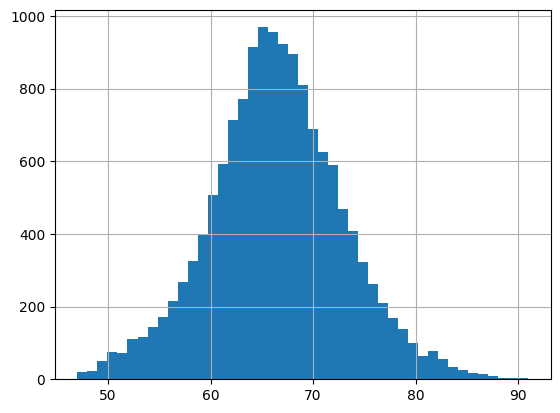

In [20]:
# overall
print(descripcion_columna("OVR"))
print(df['OVR'].describe())
nbins=1*(df.OVR.max()-df.OVR.min())+1
df['OVR'].hist(bins = nbins)
print(nbins)

In [21]:
# Analizamos los mejores jugadores por posición
best_players_per_position=df.iloc[df.groupby(df['Position'])['OVR'].idxmax()][['Position','Name','OVR']]
best_players_per_position

Position             Name  OVR
3       CAM  Jude Bellingham   90
9        CB  Virgil van Dijk   89
1       CDM            Rodri   91
5        CM  Kevin De Bruyne   90
25       LB   Theo Hernández   87
41       LM         Grimaldo   86
4        LW         Vini Jr.   90
44       RB         Carvajal   86
64       RM     Riyad Mahrez   85
10       RW    Mohamed Salah   89
0        ST    Kylian Mbappé   91

In [22]:
pd.DataFrame(df.Position.value_counts().sort_index())

count
Position       
CAM         961
CB         2924
CDM        1330
CM         1890
LB         1214
LM          968
LW          341
RB         1281
RM          896
RW          357
ST         2183

In [23]:
# Los mejores equipos, con el mejor promedio de overall raking
club_avg_overall=df.groupby("Team")["OVR"].mean().reset_index().sort_values("OVR",ascending=False)
club_avg_overall.head(10)

Team        OVR
481         Real Madrid  81.173913
365        Lombardia FC  80.260870
204   FC Bayern München  79.708333
373     Manchester City  79.640000
359          Leverkusen  79.428571
62   Atlético de Madrid  78.916667
325            Juventus  78.428571
202        FC Barcelona  78.409091
462          RB Leipzig  78.380952
381           Milano FC  78.375000

In [24]:
# Los equipos con los OVR promedio más altas, pero solo considerando los mejores jugadores (OVR >= 75)
df_best = df[df["OVR"] >= 75]
nation_avg_overall=df_best.groupby("Nation")["OVR"].mean().reset_index().sort_values("OVR",ascending=False)
nation_avg_overall.head(10)

Nation        OVR
4    Armenia  81.500000
81   Tunisia  81.000000
29     Gabon  80.333333
64    Poland  80.000000
39      Iran  80.000000
48     Libya  80.000000
35    Guinea  80.000000
38   Iceland  80.000000
73  Slovakia  79.800000
24     Egypt  79.750000

In [25]:
# Donde está argentina?
nation_avg_overall[nation_avg_overall["Nation"] == "Argentina"]

Nation        OVR
3  Argentina  78.023529

In [26]:
df_best[df_best["Nation"] == "Argentina"]

Rank                     Name  OVR  PAC  SHO  PAS  DRI  DEF  PHY  \
8       18         Lautaro Martínez   89   82   88   75   87   54   85   
12      25             Lionel Messi   88   79   85   87   92   33   64   
24      49             Paulo Dybala   87   80   85   84   89   41   65   
43      79      Alexis Mac Allister   86   69   82   85   84   76   76   
82     149           Julián Álvarez   84   85   84   80   85   57   78   
88     149          Rodrigo De Paul   84   76   77   83   82   76   82   
101    149        Lisandro Martínez   84   71   59   78   79   85   81   
105    149        Exequiel Palacios   84   69   76   79   82   82   73   
107    149          Cristian Romero   84   68   46   59   66   85   81   
113    222             Marcos Acuña   83   74   74   82   82   80   84   
121    222           Ángel Di María   83   76   80   85   88   48   66   
132    222             Mauro Icardi   83   68   83   71   76   40   75   
155    222          Guido Rodríguez   83   51   58   72   70   85   80   
182    322             Ángel Correa   82   85   84   77   86   50   75   
193    322           Enzo Fernández   82   69   73   82   80   73   77   
222    322            Nahuel Molina   82   85   67   75   78   78   71   
247    458           Luciano Acosta   81   79   73   76   85   46   56   
289    458         Nicolás Otamendi   81   60   57   64   59   83   83   
346    577               Juan Foyth   80   71   46   71   72   81   77   
351    577         Nicolás González   80   85   76   73   83   45   62   
366    577         Giovani Lo Celso   80   69   74   81   83   68   71   
373    577           Facundo Medina   80   73   36   69   72   80   79   
415    736           Ezequiel Ávila   79   77   80   65   77   45   85   
420    736         Leonardo Balerdi   79   64   45   62   68   80   77   
421    736              Éver Banega   79   52   73   81   78   73   73   
433    736     Valentin Castellanos   79   72   79   69   75   42   77   
460    736       Alejandro Garnacho   79   86   75   72   81   37   59   
481    736              Erik Lamela   79   76   77   78   82   54   68   
493    736             Pablo Maffeo   79   82   52   70   79   76   70   
579    970         Emiliano Buendía   78   69   74   80   82   66   66   
671    970          Leandro Paredes   78   62   64   83   78   71   77   
674    970          Roberto Pereyra   78   76   74   78   81   68   70   
691    970            Marcos Senesi   78   57   42   70   72   79   77   
698    970       Nicolás Tagliafico   78   76   56   70   75   76   79   
708    970              Alan Varela   78   67   62   74   73   74   78   
777   1218        Nicolás Domínguez   77   69   65   72   76   72   77   
781   1218        Sebastián Driussi   77   82   78   73   76   32   72   
788   1218        Ignacio Fernández   77   64   74   77   79   67   68   
804   1218           Santiago Hezze   77   67   62   67   71   75   77   
838   1218    Lucas Martínez Quarta   77   56   56   69   70   76   78   
850   1218         Marcelino Moreno   77   87   70   72   81   53   61   
867   1218          Germán Pezzella   77   54   49   52   57   79   75   
892   1218         Giovanni Simeone   77   71   79   63   73   41   74   
897   1218             Matías Soulé   77   75   69   74   81   36   56   
912   1218              Óscar Trejo   77   64   75   77   80   70   77   
938   1525         Rodrigo Aliendro   76   70   70   74   79   72   77   
940   1525       Santiago Ascacíbar   76   70   70   71   75   73   71   
964   1525               Lucas Boyé   76   69   75   64   78   49   81   
965   1525            Malcom Braida   76   82   69   70   76   72   72   
972   1525             Franco Cervi   76   88   67   72   78   55   52   
992   1525                Enzo Díaz   76   75   62   71   74   74   80   
1011  1525            Nicolás Figal   76   73   44   62   68   75   80   
1083  1525          Adrián Martínez   76   68   76   58   70   41   82   
1097  1525

In [27]:
# Veamos el primero, armenia
df_best[df_best["Nation"] == "Armenia"]

Rank                Name  OVR  PAC  SHO  PAS  DRI  DEF  PHY  \
144   222  Henrikh Mkhitaryan   83   78   79   82   84   72   77   
408   577     Lucas Zelarayán   80   71   77   79   83   46   67   

     Acceleration  Sprint Speed  Positioning  Finishing  Shot Power  \
144            80            77           80         78          84   
408            72            71           78         74          79   

     Long Shots  Volleys  Penalties  Vision  Crossing  Free Kick Accuracy  \
144          77       79         72      85        79                  69   
408          84       74         67      80        76                  88   

     Short Passing  Long Passing  Curve  Dribbling  Agility  Balance  \
144             85            82     83         83       85       83   
408             79            75     82         82       88       84   

     Reactions  Ball Control  Composure  Interceptions  Heading Accuracy  \
144         83            86         85             75                68   
408         78            84         70             44                54   

     Def Awareness  Standing Tackle  Sliding Tackle  Jumping  Stamina  \
144             71               72              70       79       85   
408             50               43              35       67       82   

     Strength  Aggression Position  Weak foot  Skill moves Preferred foot  \
144        72          79       CM          5            4          Right   
408        64          56      CAM          3            4          Right   

            Height        Weight Alternative positions  Age   Nation  \
144  177cm / 5'10"  75kg / 165lb                   CAM   35  Armenia   
408   172cm / 5'8"  70kg / 154lb                    ST   32  Armenia   

                 League          Team Type position  
144     Serie A Enilive  Lombardia FC    Midfielder  
408  ROSHN Saudi League      Al Fateh    Midfielder

#### El promedio se diluye porque hay muchos jugadores con OVR bajo, dejando en el top ten a países con pocos jugadores pero de muy alta calidad.


# Visualizaciones

Reduciremos el dataset para que la visualizaciones que queden tan cargadas

In [28]:
best_df = df[df["OVR"] >= 75]
print("shape", best_df.shape)


shape (1516, 50)


In [29]:
descripcion_columna("Skill moves")

'The player’s ability to perform advanced dribbling moves (rated from 1 to 5 stars).'

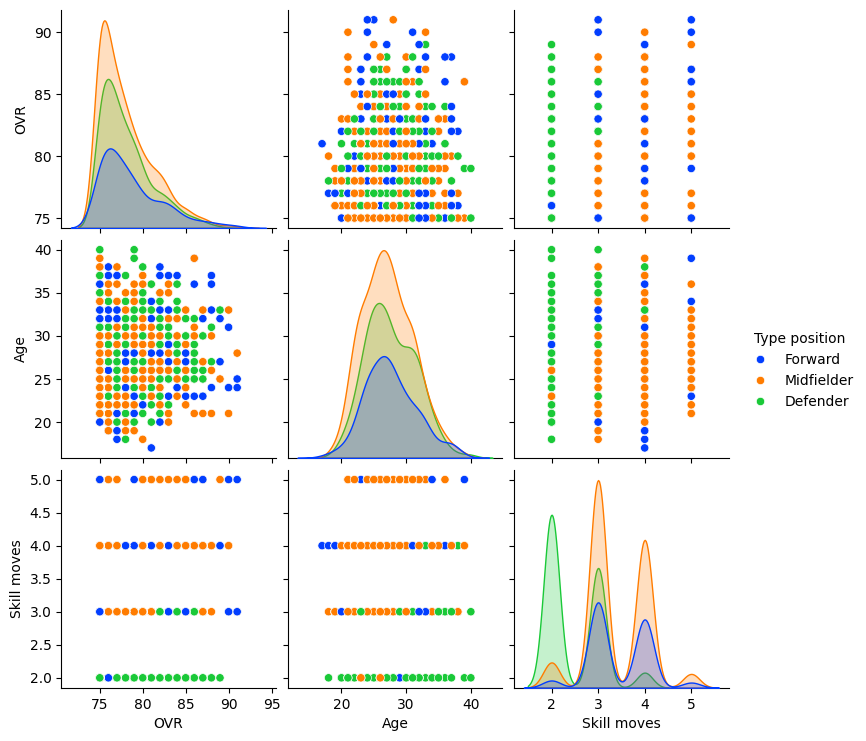

In [30]:
# Comparemos algunos atributos según el tipo de posición (delantero, mediocampista, defensor)
data_temp = best_df.loc[:,["Type position",'OVR','Age','Skill moves']]
sns.pairplot(data_temp, hue="Type position", palette='bright')

Algunos puntos que podemos observar:
- No hay una relación clara entre OVR y la edad, apenas puede visualizarse algunos puntos más alto en ranking en la parte más baja de la edad.
- Skill moves es claramente mejor valuado en posiciones de mediocampo y delanteros
- Si puede verse que la edad de los delanteros de este grupo (overrall > 75) es más baja que la de otras posiciones

Pace: A summary attribute for speed-related skills.


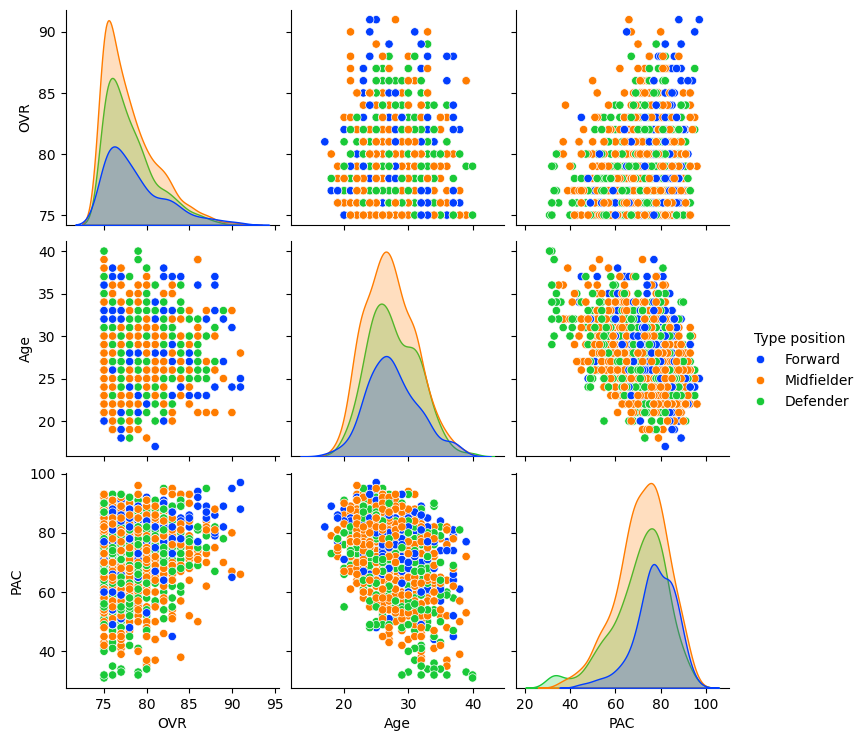

In [31]:
print(descripcion_columna("PAC"))
data_temp = best_df.loc[:,["Type position",'OVR','Age','PAC']]
sns.pairplot(data_temp, hue="Type position", palette='bright')

Observaciones:
- el pace: relacionado con la velocidad, si tiene una relación con la edad, la cual disminuye con el incremento de la edad (inversamente proporcional)
- pasa similar con el overall ranking, seguramente porque estas variables de velocidad infieren en ese promedio.
- en cuanto a posiciones y velocidad, no está claro. Si puede observarse jugadores con edad superior y PAC menor en este dataset reducido (de los mejores rank)

In [32]:
summary_vars = ["OVR", "PAC", "SHO", "PAS", "DRI", "DEF", "PHY"]
for var in summary_vars:
    print(descripcion_columna(var))

Overall rating of the player.
Pace: A summary attribute for speed-related skills.
Shooting: A summary attribute for shooting-related skills.
Passing: A summary attribute for passing-related skills.
Dribbling: A summary attribute for dribbling-related skills.
Defense: A summary attribute for defensive skills.
Physical: A summary attribute for physical skills.


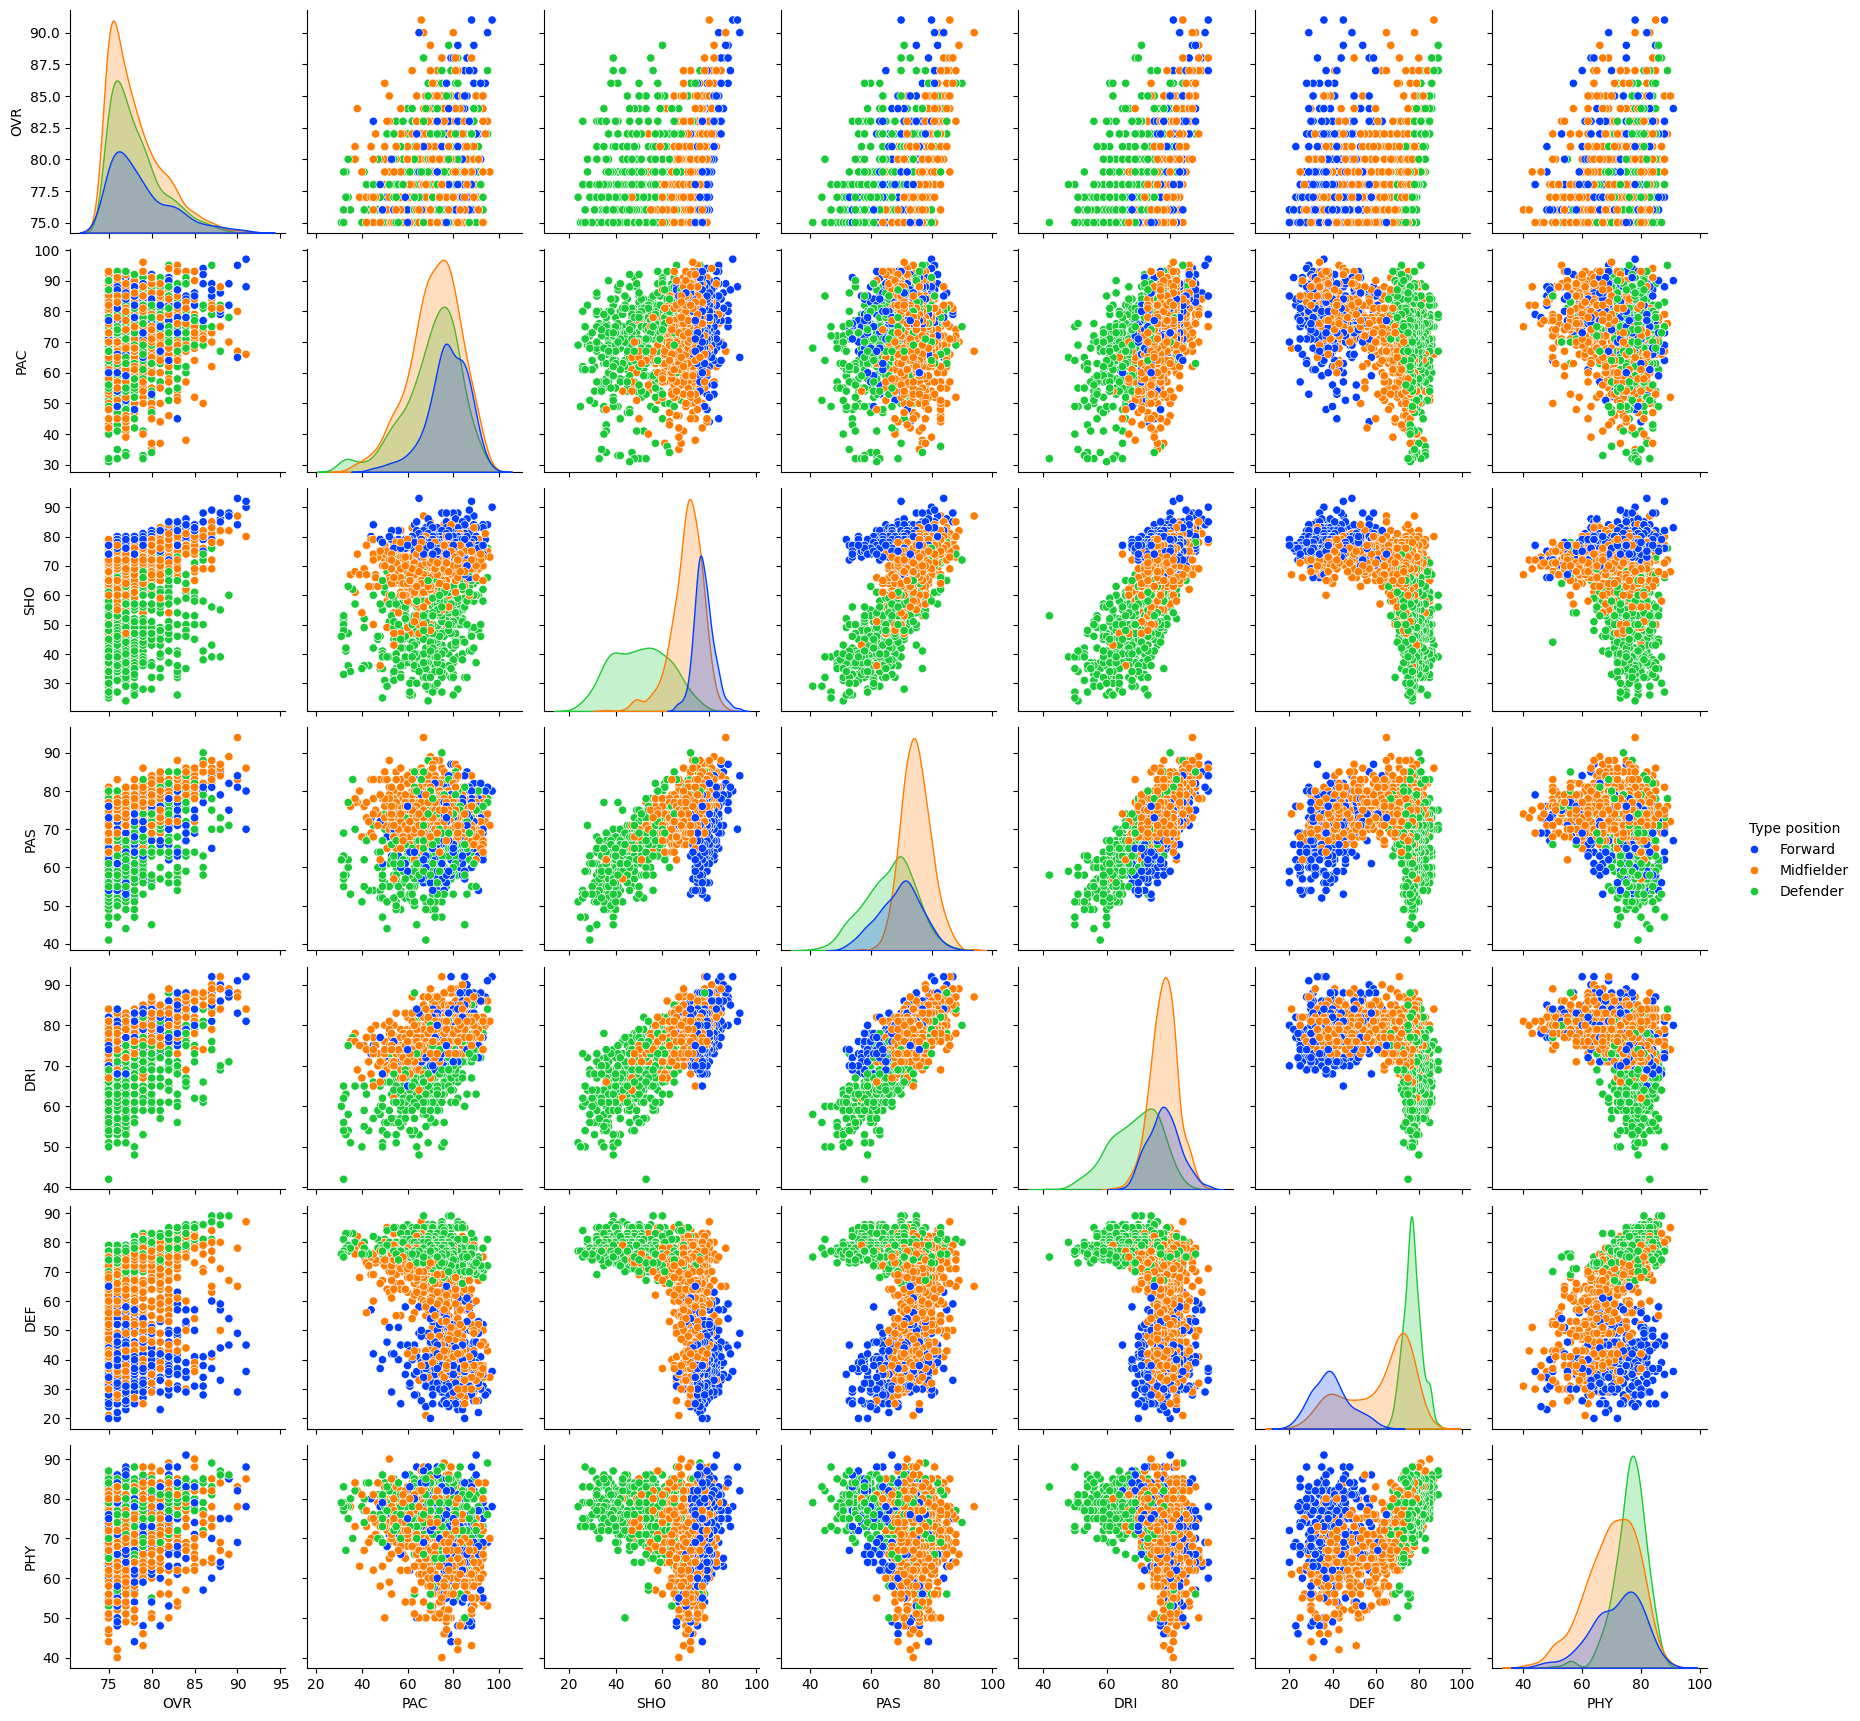

In [33]:
data_temp = best_df.loc[:,["Type position", *summary_vars]]
sns.pairplot(data_temp, hue="Type position", palette='bright')

Se observan, con sentido, cierta relación entre estos agrupadores de skills y la posición que ocupa. Por ejemplo, tiene sentido ver en lo más alto a los delanteros en Shotting, o a las defensores bien arriba en Defensive. Los relativos a la velocidad (PAC) y a lo físico (PHY) no tienen agrupamientos por posición tan claros 

In [34]:
df_skills = df_best[["Name", "Team"] + get_skills_columns()]

def scatter_matrix(skill_1, skill_2):
    graf1 = go.Scatter(
        x=df_skills[skill_1], 
        y=df_skills[skill_2],
        mode='markers',
        text=df_skills.loc[:,'Name'], #'Height', 'Weight', 'Club', 'Age', 'Name','Position'
        marker=dict(size=5)
    )
    layout = go.Layout(
        title=f"Camparación de 2 skills: {skill_1} VS {skill_2}", font=dict(size=20),
        xaxis=dict(title=skill_1),
        yaxis=dict(title=skill_2),
        autosize=True, 
        width=1366,
        height=969
    )
    fig = go.Figure(data=graf1, layout=layout)
    fig.show()

In [35]:
skill_1 = "Dribbling"
skill_2 = "Sprint Speed"

scatter_matrix(skill_1, skill_2)


In [36]:
skill_1 = "Composure"
skill_2 = "Penalties"

scatter_matrix(skill_1, skill_2)


# 3. Se realizó alguna normalización o escalado de la base? ¿porqué?

Todas las variables numéricas que especifican desempeño por habilidad van entre 0-100.

Luego, tenemos dos columnas, Weak foot	Skill moves, que están en el rango [0-5].

Las variables de peso y altura no son numéricas porque están en ambos sistemas de medición (imperial y métrico). Habría que trabajar sobre esos datos.

Para la aplicación de las siguientes técnicas, es posible que se requiera normalizar y/o escalar alguna o varias de estas columnas.

# 4. Aplicación de clustering

Aplicación de clustering para encontrar grupos de jugadores con habilidades equivalentes, por ejemplo, jugadores que podrían intercambiarse en el caso de una lesión o cuando un jugador está cansada. Para esto utilice como mínimo dos técnicas de clustering: por ejemplo k-medias, DBSCAN, mezcla de Gaussianas y/o alguna jerárquica. Justifiquen por qué eligen los diferentes hiper-parámetros que se puedan elegir según el método: número de clusters, medida de distancia, criterio de aglomeración… 

In [37]:
df.head()
print("shape", df.shape)

shape (14345, 50)


### K-medias

In [38]:
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition

random_state = 42
df_skills = df[get_skills_columns()]
df_skills


Acceleration  Sprint Speed  Positioning  Finishing  Shot Power  \
0                97            97           93         94          90   
1                65            66           76         74          92   
2                80            94           96         96          94   
3                81            80           91         90          85   
4                95            95           87         89          81   
...             ...           ...          ...        ...         ...   
14340            32            31           39         44          48   
14341            66            67           47         34          50   
14342            55            59           50         47          44   
14343            69            63           45         24          52   
14344            51            60           37         31          40   

       Long Shots  Volleys  Penalties  Vision  Crossing  Free Kick Accuracy  \
0              83       84         84      83        78                  69   
1              89       71         62      84        76                  64   
2              83       90         90      74        58                  62   
3              86       77         74      90        66                  68   
4              83       73         71      85        81                  62   
...           ...      ...        ...     ...       ...                 ...   
14340          50       25         43      55        38                  44   
14341          33       32         40      43        35                  39   
14342          50       32         51      45        38                  29   
14343          39       33         42      41        39                  39   
14344          32       26         41      35        35                  34   

       Short Passing  Long Passing  Curve  Dribbling  Agility  Balance  \
0                 86            71     80         93       93       82   
1                 93            91     86         84       66       67   
2                 77            66     77         79       77       69   
3                 89            89     73         89       82       79   
4                 83            77     79         93       94       84   
...              ...           ...    ...        ...      ...      ...   
14340             45            51     46         51       64       68   
14341             54            56     30         41       59       71   
14342             37            33     36         49       60       66   
14343             52            55     33         45       54       59   
14344             51            50     32         43       57       60   

       Reactions  Ball Control  Composure  Interceptions  Heading Accuracy  \
0             93            92         88             38                73   
1             93            90         94             84                81   
2             94            83         87             43                83   
3             91            89         87             82                75   
4             86            90         83             26                50   
...          ...           ...        ...            ...               ...   
14340         32            50         53             23                37   
14341         46            42         36             37                47   
14342         48            48         46             41                50   
14343         46            43         39             42                49   
14344         45            42         39             43                42   

       Def Awareness  Standing Tackle  Sliding Tackle  Jumping  Stamina  \
0                 26               34              32       88       88   
1                 92               87              82       83       91   
2                 38               47              29       92       76   
3                 77               79              77  

In [39]:

n_clust = 3
km = KMeans(n_clusters=n_clust, random_state=random_state)
km.fit(df_skills)

clusters = km.labels_
print('Suma de los cuadrados de las distancias al centro de cada cluster=Inertia= ', km.inertia_)

Suma de los cuadrados de las distancias al centro de cada cluster=Inertia=  39542240.09580506


In [40]:
df_clusters = df.copy()
df_clusters['kmeans_3'] = km.labels_

df_clusters['kmeans_3'].value_counts()

kmeans_3
1    5270
0    4636
2    4439
Name: count, dtype: int64

In [41]:
import plotly.express as px

def scatter_matrix(skill_1, skill_2):
    fig = px.scatter(
        df_clusters,
        x=skill_1,
        y=skill_2,
        color="kmeans_3",
        hover_name="Name",
        title=f"Clusters by KMeans (kmeans_3): {skill_1} vs {skill_2}",
        width=900,
        height=600
    )
    fig.show()

In [42]:
skill_1 = "Composure"
skill_2 = "Penalties"
scatter_matrix(skill_1, skill_2)

In [43]:
skill_1 = "Dribbling"
skill_2 = "Sprint Speed"
scatter_matrix(skill_1, skill_2)

In [44]:
skill_1 = "Interceptions"
skill_2 = "Vision"
scatter_matrix(skill_1, skill_2)

In [45]:
from random import choices

skill_1, skill_2 = choices(get_skills_columns(), k=2)
scatter_matrix(skill_1, skill_2)

In [52]:
from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer
model = KMeans()

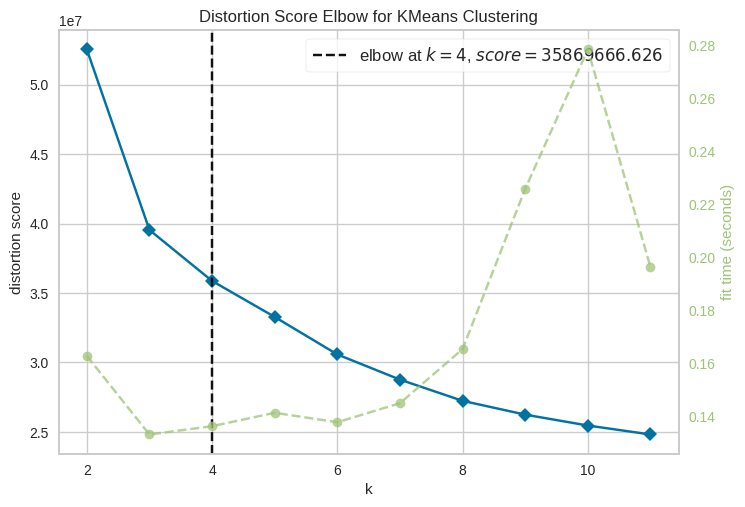

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [53]:
fig = KElbowVisualizer(model, k=(2,12))
fig.fit(df_skills)
fig.show()

Se ve claramente que 3 es un buen número de cluster (la agrupación de position actual)

De vuelta, 3 es el que tiene el mejor score de silueta. Reduzcamos la dimensionalidad con PCA y veamos las siluetas

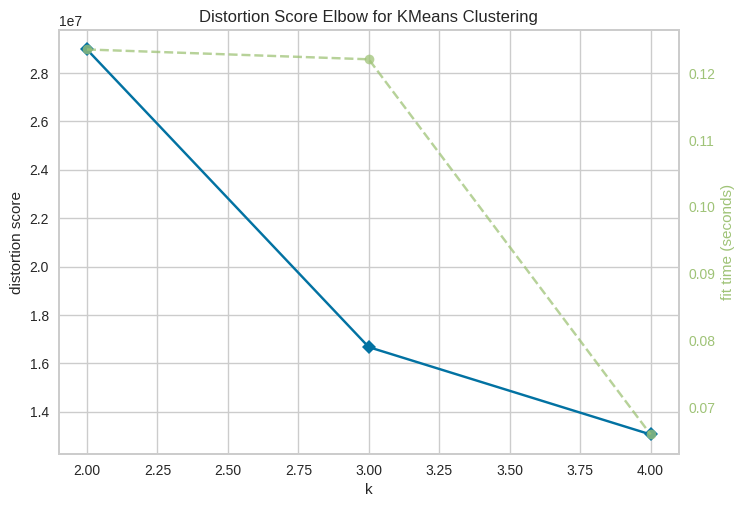

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [54]:
from sklearn.decomposition import PCA

# Si X tiene shape (n_samples, 4)
pca = PCA(n_components=2)
X_2d = pca.fit_transform(df_skills)
df_ = pd.DataFrame(X_2d, columns=['PCA1', 'PCA2'])
model = KMeans()
fig = KElbowVisualizer(model, k=(2,5))
fig.fit(df_)
fig.show()

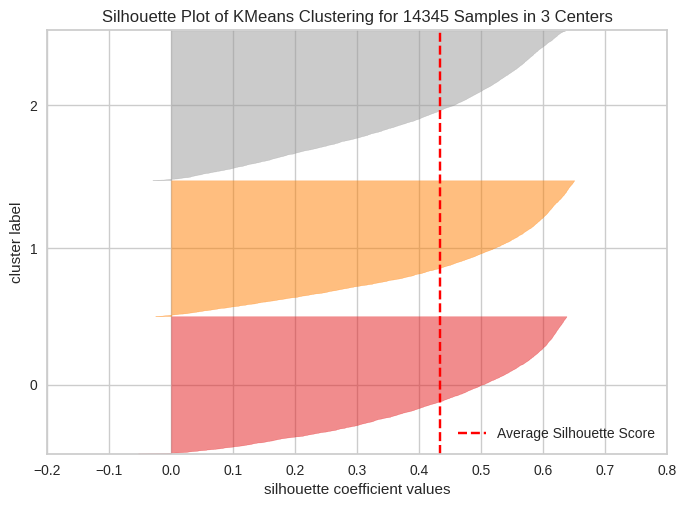

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 14345 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [55]:
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(3,random_state=random_state)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(df_)
visualizer.show()

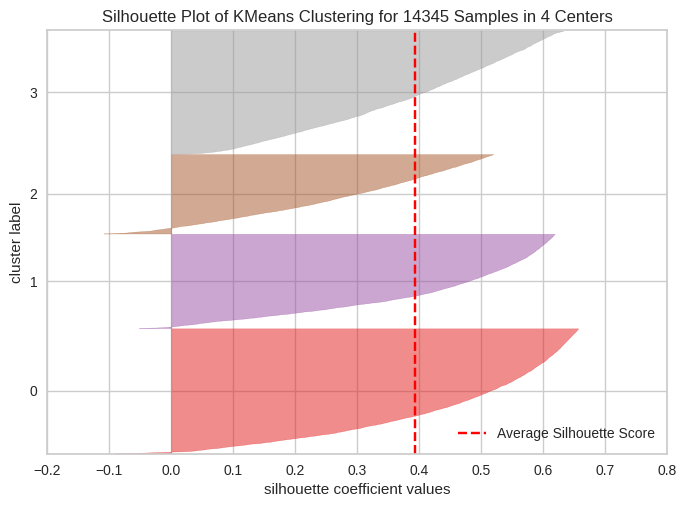

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 14345 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [56]:
model = KMeans(4,random_state=random_state)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(df_)
visualizer.show()

Con 3 cluster, las siluetas son más parejas, sin (casi) valores negativos

In [ ]:
# toma del notebook de clase
# Vamos a ver cuanta varianza explica cada componente principal
dim_reduce = PCA()
dim_reduce_fit = dim_reduce.fit_transform(df_skills)

explained_variance = dim_reduce.explained_variance_ratio_
cum_var_exp = np.cumsum(explained_variance) 

# Iterate through the zipped list and print each pair
for num_components, cumulative_variance, explained_variance in zip(range(37), cum_var_exp,explained_variance):
    print(f"{num_components+1}\t{cumulative_variance:.4f}\t{explained_variance:.4f}")

1	0.4034	0.4034
2	0.6801	0.2766
3	0.7762	0.0962
4	0.8265	0.0502
5	0.8462	0.0198
6	0.8638	0.0176
7	0.8783	0.0145
8	0.8917	0.0134
9	0.9040	0.0123
10	0.9155	0.0115
11	0.9242	0.0087
12	0.9321	0.0079
13	0.9395	0.0074
14	0.9464	0.0069
15	0.9527	0.0063
16	0.9582	0.0056
17	0.9634	0.0052
18	0.9684	0.0050
19	0.9731	0.0047
20	0.9773	0.0042
21	0.9811	0.0038
22	0.9848	0.0037
23	0.9882	0.0034
24	0.9914	0.0032
25	0.9945	0.0030
26	0.9965	0.0020
27	0.9981	0.0016
28	0.9993	0.0012
29	1.0000	0.0007


De 29 variables, con 16 tengo el 96% de la variabilidad.

In [57]:
def dim_reduction(x):
    dim_reduce = PCA(n_components=16)
    dim_reduce_fit = dim_reduce.fit_transform(x)
    return dim_reduce, dim_reduce_fit

dim_reduce, dim_reduce_fit = dim_reduction(df_skills)

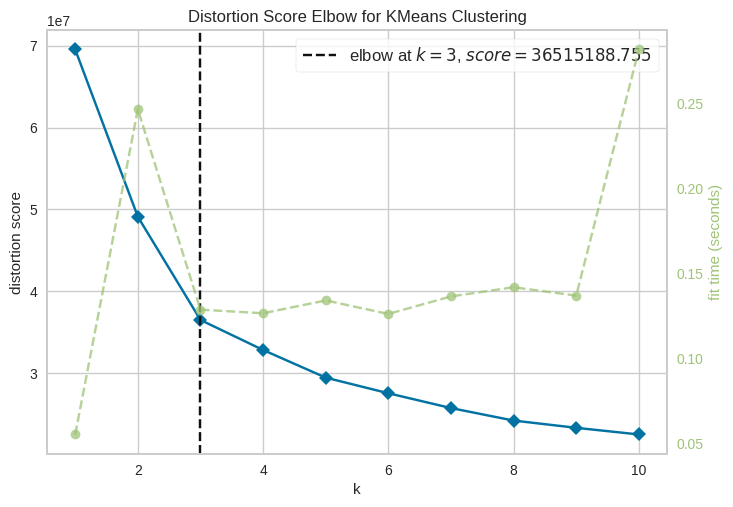

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [58]:

model = KMeans()
fig = KElbowVisualizer(model, k=(1,11))
fig.fit(dim_reduce_fit)
fig.show()

Seguimos viendo k=3. Veamos siluetas

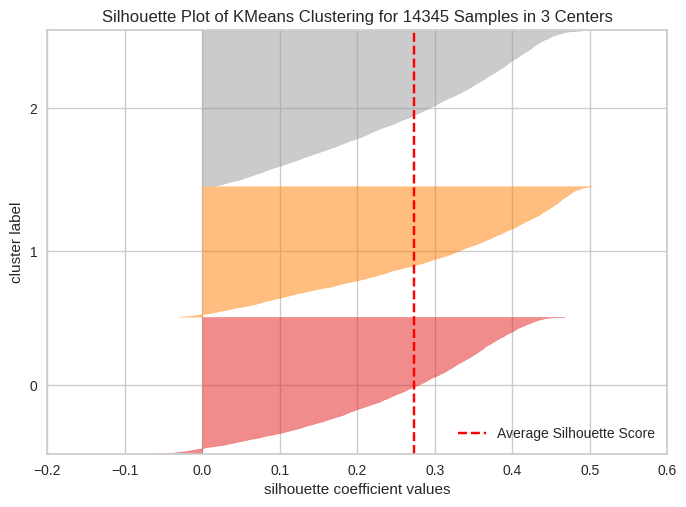

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 14345 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [59]:
model = KMeans(3,random_state=42)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(dim_reduce_fit)
visualizer.show()

>> Otro método de clustering

# 5. Análisis cualitativo de los clusters

Análisis cualitativo de los clusters encontrados. ¿Qué hay en cada cluster? ¿Son efectivamente equivalentes los jugadores de un cluster, es decir, podrían cumplir el mismo rol en un equipo? Si se trata de clusters heterogéneos, ¿por qué razón pueden haber sido agrupadas los jugadores del cluster? ¿Qué motiva las diferencias en tamaño?

### Analicemos Type Position VS Kmeans_3 para ver como quedaron

In [ ]:
df_clusters["Type position"].value_counts()

Type position
Midfielder    6045
Defender      5419
Forward       2881
Name: count, dtype: int64

In [ ]:
df_clusters["kmeans_3"].value_counts()

kmeans_3
1    5270
0    4636
2    4439
Name: count, dtype: int64

<Axes: xlabel='kmeans_3', ylabel='count'>

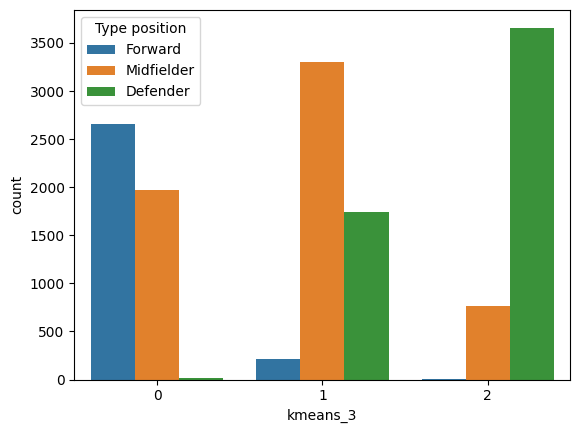

In [ ]:
sns.countplot(df_clusters,x="kmeans_3",hue="Type position")

In [ ]:
pd.crosstab(index=df_clusters['kmeans_3'], columns=df_clusters['Type position'])

Type position  Defender  Forward  Midfielder
kmeans_3                                    
0                    12     2655        1969
1                  1747      217        3306
2                  3660        9         770

In [ ]:
# Mirar un poco los clusters..
# Analizar las variables summary por cluster
summary_vars = ["OVR", "PAC", "SHO", "PAS", "DRI", "DEF", "PHY"]
# Analizar varianzas de estas variables por cluster..


['PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY']


# 6. Uso de alguna transformación (proyección, embedding)

Uso de alguna transformación (proyección, Embedding) para visualizar los resultados y/o usarla como preprocesado para aplicar alguna técnica de clustering.